In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.convolution import Gaussian2DKernel
from scipy.signal import fftconvolve

In [2]:
T = np.array([20, 30, 90, 100, 150, 300])
x = np.array([1226, 427, 52, 44, 21, 4.9])
y = np.array([1618, 603, 75, 51, 22, 5.0])

In [4]:
def log_linear(x, a, b):
    y = a * x + b
    return y

In [5]:
popt, pcov = curve_fit(log_linear, np.log10(T), np.log10(x))

In [6]:
popt

array([-1.99506581,  5.63430392])

In [7]:
array = np.arange(1, 3, 0.01)
x_fit = log_linear(array, popt[0], popt[1])

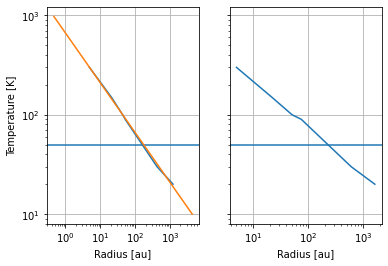

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].loglog(x, T)
axs[0].set_xlabel('Radius [au]')
axs[0].set_ylabel('Temperature [K]')
axs[1].loglog(y, T)
axs[1].set_xlabel('Radius [au]')
for i in range(2):
    axs[i].axhline(50)
    axs[i].grid()
axs[0].loglog(10 ** x_fit, 10 ** array)

In [9]:
T_co2 = log_linear(np.log10(40), popt[0], popt[1])
10 ** T_co2

274.21348502708406

In [4]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y, indexing='ij')

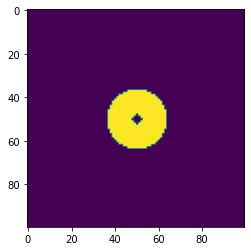

In [29]:
# for L483
d = 200 # in pc
rin = 44 / d
rout = 274 / d
T_b = 21
emission_dist = np.zeros_like(X)
emission_dist[(X ** 2 + Y ** 2 > rin ** 2) & (X ** 2 + Y ** 2 < rout ** 2)] = T_b
plt.imshow(emission_dist)

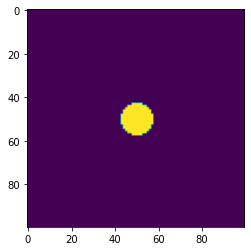

In [20]:
# for MWC 480
d = 162 # in pc
rin = 60 / d
r = 90 / d
rout = 120 / d
r_width = 60 / d
T_b = 1.0
emission_dist = np.zeros_like(X)
condition = ((X - r) ** 2 + Y ** 2 < r_width ** 2) | ((X + r) ** 2 + Y ** 2 < r_width ** 2)
condition = (X ** 2 + Y ** 2 < rout ** 2) & (np.abs(Y) < np.abs(X)) & (Y > 0) & (X ** 2 + Y ** 2 > rin ** 2)
condition = X ** 2 + Y ** 2 < rout ** 2
emission_dist[condition] = T_b
plt.imshow(emission_dist)

In [25]:
beam_HPBW = 300 # in 100 mas
beam_sigma = beam_HPBW / np.sqrt(8 * np.log(2))
beam_kernel = Gaussian2DKernel(beam_sigma, beam_sigma, theta=0)

In [26]:
obs = fftconvolve(emission_dist, beam_kernel, mode='same')
#obs = fftconvolve(beam_kernel, beam_kernel, mode='same')

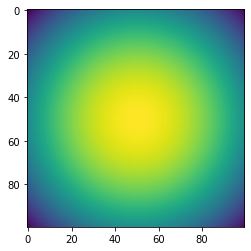

In [27]:
plt.imshow(obs)

In [22]:
Tb_agundez = 0.12

In [28]:
np.max(obs)

0.15754788037520817

In [48]:
np.max(emission_dist)

54.0

In [201]:
1 - np.exp(-1.44*25/25)

0.7630722413178782